# DSR - Practical 1 - Perceptron

## perceptron and the delta rule

#### Perceptron training:
1. Initialize weights vector with small random numbers
2. Repeat until convergence:
    Loop over feature vector (𝑥j) and labels (li) in training set D.
    Take 𝑥 and pass it through the perceptron, calculating the output values: 
    $$ y_{j}=w(t)\cdot x_{j}=ƒ(w(t)){x_{j}}$$
    Update weights: 
    $$ w_{i}(t+1)=w_{i}(t)+\alpha(l_{j}-y_{j})x_{j}$$  
    for all 0 <= i < n
3. Terminate criterion

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 5
np.random.randn(N) / np.sqrt(N)

array([ 0.18279216, -0.50227646,  0.59622321, -0.28000422, -0.30458207])

### Update the perceptron class where it sais: # ENTER YOUR CODE HERE

# Class
- i = 3, then i is an object
- import BlaBlaBla
- __init__ initiats few variables
- self is available through out
- then different methods like functions
- the following method can be used for only linearly seprable classification problem

In [75]:
class Perceptron:
    # N is the length of are input feature 
    # alpha learning rate
    def __init__(self, N, alpha=0.1):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N) / np.sqrt(N) # normalizing the weigts 
        self.N = N
        self.alpha = alpha

    # def sigmoid(x):
    #     return 1/(1+np.exp(-x))   
        
    def step(self, x):
        # apply a step activation function
        # ENTER YOUR CODE HERE
        return 1 if x > 0 else 0
        # if x <= 0:
        #     return 0
        # else:
        #     return 1 
    
    def fit(self, X, y, epochs=10, addBias=True):
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        print("Dimension of the input:", self.W.shape[0])
        if addBias:
            print(addBias)
            X = np.c_[X, np.ones((X.shape[0]))]
            self.W = np.random.randn(self.N+1) / np.sqrt(self.N)
            print("Dimension of the input after adding the bias:", self.W.shape[0])# dimension increses by 1 since we added the bias
        
        # loop over the desired number of epochs
        w = self.W
        
        for epoch in np.arange(0, epochs):
            # loop over each individual data point
                for (x, target) in zip(X, y):
                # take the dot product between the input features
                # and the weight matrix, then pass this value
                # through the step function to obtain the prediction
                    
                    # ENTER YOUR CODE HERE FOR 
                    net = np.dot(x, self.W)
                
                    p = self.step(net)
                    # perform weight update if prediction
                    # does not match trget
                    if p != target:
                        # calculate delta
                        delta =  target - p
                        # update the weight matrix
                        # ENTER YOUR CODE HERE
                        self.W = self.W + self.alpha * delta * x
                        w = np.append(w, self.W)
                                                
        return w
    def predict(self, X, addBias=True):
        # ensure our input is a matrix
        X = np.atleast_2d(X)
        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1's as the last entry in the feature
            # matrix (bias)
            X = np.c_[X, np.ones((X.shape[0]))]
            # take the dot product between the input features and the
            # weight matrix, then pass the value through the step
            # function
        return self.step(np.dot(X, self.W))
    

## Logical OR dataset

In [76]:
# construct the OR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])

# define our perceptron and train it
print("training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20,addBias=False)

training perceptron...
Dimension of the input: 2


array([0.36334882, 0.67570333])

In [77]:
# now that our perceptron is trained we can evaluate it
print("testing perceptron...")

# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x,addBias=False)
    print("data={}, true_label={}, pred={}".format(x, target[0], pred))

testing perceptron...
data=[0 0], true_label=0, pred=0
data=[0 1], true_label=1, pred=1
data=[1 0], true_label=1, pred=1
data=[1 1], true_label=1, pred=1


## logical AND dataset

In [78]:
# np.shape(X)

In [79]:
# construct the AND dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# create a perceptron instance and fit it to the above dataset
### ENTER YOUR CODE HERE
# define our perceptron and train it
print("training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=200,addBias=False)

# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x,addBias=False)
    print("data={}, true_label={}, pred={}".format(
        x, target[0], pred))


training perceptron...
Dimension of the input: 2
data=[0 0], true_label=0, pred=0
data=[0 1], true_label=0, pred=1
data=[1 0], true_label=0, pred=1
data=[1 1], true_label=1, pred=1


## did it work?
### try changing the addBias to True and see if this helps.
#### what is this bias parameter???

In [80]:
# ENTER YOUR CODE HERE
# construct the AND dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# create a perceptron instance and fit it to the above dataset
### ENTER YOUR CODE HERE
# define our perceptron and train it
print("training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20,addBias=True)


training perceptron...
Dimension of the input: 2
True
Dimension of the input after adding the bias: 3


array([ 0.82992661,  0.44257468, -0.23758522,  0.82992661,  0.34257468,
       -0.33758522,  0.72992661,  0.34257468, -0.43758522,  0.62992661,
        0.34257468, -0.53758522,  0.52992661,  0.34257468, -0.63758522])

In [81]:
# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x,addBias=True)
    print("data={}, true_label={}, pred={}".format(
        x, target[0], pred))


data=[0 0], true_label=0, pred=0
data=[0 1], true_label=0, pred=0
data=[1 0], true_label=0, pred=0
data=[1 1], true_label=1, pred=1


## change the perceptron class such that you return the wieghts after each iteration

Dimension of the input: 2
True
Dimension of the input after adding the bias: 3
data=[0 0], true_label=0, pred=0
data=[0 1], true_label=0, pred=0
data=[1 0], true_label=0, pred=0
data=[1 1], true_label=1, pred=1


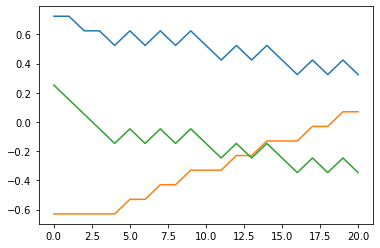

In [83]:
## change the Perceptron class such that you save the weights 
## during training and return them then plot them
# ENTER YOUR CODE HERE
p = Perceptron(X.shape[1], alpha=0.1)
w = p.fit(X, y, epochs=20,addBias=True)

w1 = w[0:len(w):3]
w2 = w[1:len(w):3]
w3 = w[2:len(w):3]

for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x,addBias=True)
    print("data={}, true_label={}, pred={}".format(
        x, target[0], pred))
    
plt.plot(w1)
plt.plot(w2)
plt.plot(w3)



### change learning rate to 0.01 and repeat 

### what does reducing the learing rate do?

Dimension of the input: 2
True
Dimension of the input after adding the bias: 3
data=[0 0], true_label=0, pred=1
data=[0 1], true_label=0, pred=1
data=[1 0], true_label=0, pred=1
data=[1 1], true_label=1, pred=1


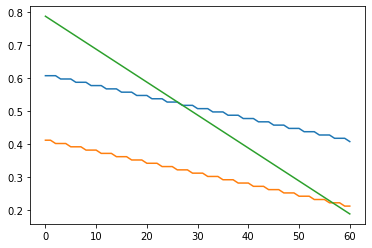

In [84]:
## change the Perceptron class such that you save the weights 
## during training and return them then plot them
# ENTER YOUR CODE HERE
p = Perceptron(X.shape[1], alpha=0.01)
w = p.fit(X, y, epochs=20,addBias=True)

w1 = w[0:len(w):3]
w2 = w[1:len(w):3]
w3 = w[2:len(w):3]

for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x,addBias=True)
    print("data={}, true_label={}, pred={}".format(
        x, target[0], pred))
    
plt.plot(w1)
plt.plot(w2)
plt.plot(w3)



### Train the perceptron on he XOR data set


Dimension of the input: 2
True
Dimension of the input after adding the bias: 3
data=[0 0], true_label=0, pred=1
data=[0 1], true_label=1, pred=0
data=[1 0], true_label=1, pred=0
data=[1 1], true_label=0, pred=0


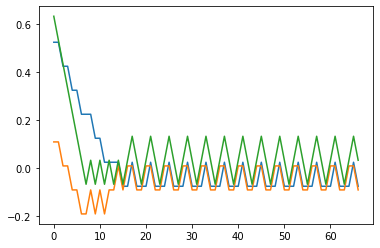

In [85]:
# construct the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
# ENTER YOUR CODE HERE
p = Perceptron(X.shape[1], alpha=0.1)
w = p.fit(X, y, epochs=20,addBias=True)

w1 = w[0:len(w):3]
w2 = w[1:len(w):3]
w3 = w[2:len(w):3]

for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x,addBias=True)
    print("data={}, true_label={}, pred={}".format(
        x, target[0], pred))
    
plt.plot(w1)
plt.plot(w2)
plt.plot(w3)


### Were you able to solve the XOR problem? 
### How is this problem different then the AND and OR problems?


### Perceptron for a regression problem

In [86]:
X = np.arange (0,100,1)
noise = np.random.normal(loc=0.0, scale=5, size=100)
y = 70 + 1.2*X + noise

# normalization of inputs and lables 
y=y/np.max(X)
X=X/np.max(X)

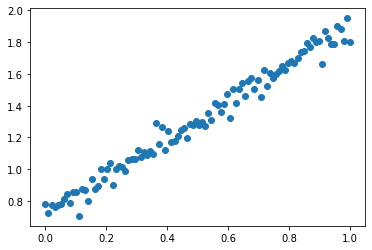

In [87]:
plt.scatter(X, y)

#### How should you change the dyrp (activation) function to fit a regression problem???

In [88]:
# implement the perceptron class here for regression
# ENTER YOUR CODE HERE
class Perceptron:
    # N is the length of are input feature 
    # alpha learning rate
    def __init__(self, N, alpha=0.1):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N) / np.sqrt(N) # normalizing the weigts 
        self.N = N
        self.alpha = alpha

    # def sigmoid(x):
    #     return 1/(1+np.exp(-x))   
        
    def step(self, x):
        # apply a step activation function
        # ENTER YOUR CODE HERE
        return x if x > 0 else 0
        # if x <= 0:
        #     return 0
        # else:
        #     return 1 
    
    def fit(self, X, y, epochs=10, addBias=True):
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        print("Dimension of the input:", self.W.shape[0])
        if addBias:
            print(addBias)
            X = np.c_[X, np.ones((X.shape[0]))]
            self.W = np.random.randn(self.N+1) / np.sqrt(self.N)
            print("Dimension of the input after adding the bias:", self.W.shape[0])# dimension increses by 1 since we added the bias
        
        # loop over the desired number of epochs
        w = self.W
        
        for epoch in np.arange(0, epochs):
            # loop over each individual data point
                for (x, target) in zip(X, y):
                # take the dot product between the input features
                # and the weight matrix, then pass this value
                # through the step function to obtain the prediction
                    
                    # ENTER YOUR CODE HERE FOR 
                    net = np.dot(x, self.W)
                
                    p = self.step(net)
                    # perform weight update if prediction
                    # does not match trget
                    if p != target:
                        # calculate delta
                        delta =  target - p
                        # update the weight matrix
                        # ENTER YOUR CODE HERE
                        self.W = self.W + self.alpha * delta * x
                        w = np.append(w, self.W)
                                                
        return w
    def predict(self, X, addBias=True):
        # ensure our input is a matrix
        X = np.atleast_2d(X)
        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1's as the last entry in the feature
            # matrix (bias)
            X = np.c_[X, np.ones((X.shape[0]))]
            # take the dot product between the input features and the
            # weight matrix, then pass the value through the step
            # function
        return self.step(np.dot(X, self.W))
    

In [101]:
# define our perceptron and train it with and without bias

p = Perceptron(1, alpha=0.1)
w=p.fit(X, y, epochs=20, addBias=True)
print("training perceptron...")

Dimension of the input: 1
True
Dimension of the input after adding the bias: 2
training perceptron...


(10,)


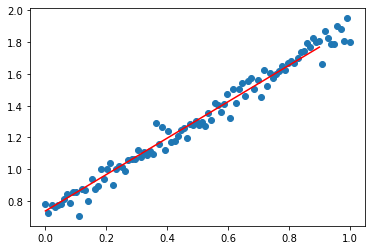

In [102]:
# PLOT DATA AS ABOVE AND ADD A PLOT OF THE PREDICTION
### ENTER YOUR CODE HERE
plt.scatter(X,y)
x = np.arange(0,1,0.1)
print(x.shape)
predictions=[]
for xx in x:
    pred=p.predict(xx,addBias=True)
    predictions.append(pred)
plt.plot(x,predictions,c="red")    

(10,)


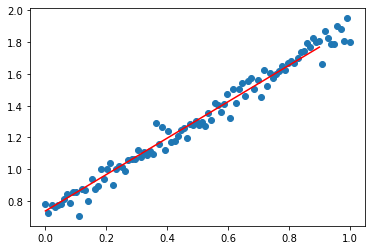

In [103]:
# PLOTTING DATA AS ABOVE AND ADD A PLOT OF THE PREDICTION

plt.scatter(X,y)
x = np.arange(0,1,0.1)
print(x.shape)
predictions=[]
for xx in x:
    pred=p.predict(xx,addBias=True)
    predictions.append(pred)
plt.plot(x,predictions,c="red")    

Dimension of the input: 1
training perceptron...
(10,)


c:\Users\DAnand\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


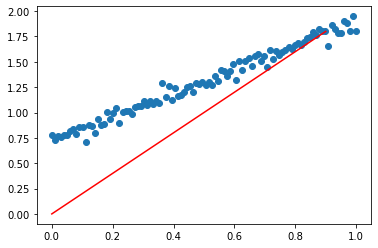

In [104]:
# define our perceptron and train it

p = Perceptron(1, alpha=0.1)
w=p.fit(X, y, epochs=20,addBias=False)
print("training perceptron...")
# PLOT DATA AS ABOVE AND ADD A PLOT OF THE PREDICTION
### ENTER YOUR CODE HERE
plt.scatter(X,y)
x = np.arange(0,1,0.1)
print(x.shape)
predictions=[]
for xx in x:
    pred=p.predict(xx,addBias=False)
    predictions.append(pred)
plt.plot(x,predictions,c="red")    

### What is the difference with and without Bias? 

In [105]:
X = np.arange (0,100,1)
noise = np.random.normal(loc=0.0, scale=5, size=100)
y = 70 + 1.2*X + noise

# # normalization of inputs and lables 
# y=y/np.max(X)
# X=X/np.max(X)

### repeat the training without the normalization of the data, what happend?

Dimension of the input: 1
training perceptron...
(10,)


c:\Users\DAnand\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


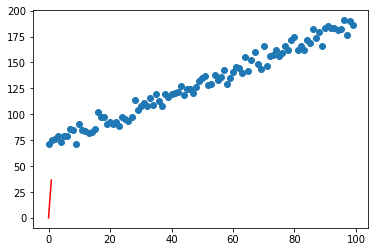

In [106]:
# ENTER YOUR CODE HERE
# define our perceptron and train it

p = Perceptron(1, alpha=0.01)
w=p.fit(X, y, epochs=50,addBias=False)
print("training perceptron...")
# PLOT DATA AS ABOVE AND ADD A PLOT OF THE PREDICTION
### ENTER YOUR CODE HERE
plt.scatter(X,y)
x = np.arange(0,1,0.1)
print(x.shape)
predictions=[]
for xx in x:
    pred=p.predict(xx,addBias=False)
    predictions.append(pred)
plt.plot(x,predictions,c="red")  

### where you able to train the model? Why not? plot the weights and see how they look when the data is normalized and when the data is not normalized.

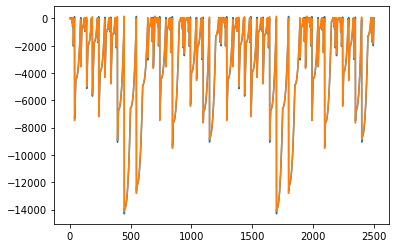

In [107]:
# PLOT THE WEIGHTS AS A FUNCTION OF TRAINING
# ENTER YOUR CODE HERE
# PLOT THE WEIGHTS AS A FUNCTION OF TRAINING
plt.plot(w[0:len(w):2])
plt.plot(w[1:len(w):2])

### using the normalized data retrain the perceptron only initial the weights using the following:
self.W = np.random.randn(N) * 1000

#### What do you think will happen, why?
